In [1]:
from numba_code import *
import matplotlib.pyplot as plt
plt.style.use('default')

## Test 4, one mutant, K=1000, s=0.001

In [2]:
#Initial state for the star
in_numbers=np.array([[0.,1000.],[1.,999.],[0.,1000.],[0.,1000.]]).astype(np.int64)
    
#Parameters
m=0.05
mO=m/2
mI=3*mO
s=0.001
fitnesses=np.array([1+s,1])
nb_cycles=2500
t=np.log(100)
N_demes=4
K=1000
folder='Test4/Star'

In [3]:
#Migration matrix of the star
migration_matrix=define_star(N_demes,mI,mO, equal_contribution=True)

In [4]:
#Fixation probability 
nb_sim=100000
et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=2500, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 100000 simulations is 0.00949, with 
 average extinction time 9.120513674773601 and 
 average fixation time 1737.604847207587


In [5]:
folder='Test4/Wm'

#Migration matrix of the clique
migration_matrix=define_clique(N_demes,m)

In [7]:
#Fixation probability 
et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=2500, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 100000 simulations is 0.00924, with 
 average extinction time 8.730459445274334 and 
 average fixation time 1802.8982683982683


In [8]:
#Migration matrix of the clique
migration_matrix=np.array([[1]])

in_numbers=np.array([[1.,3999.]]).astype(np.int64)

nb_sim=100000
K=4000

et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=2500, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 100000 simulations is 0.00864, with 
 average extinction time 8.690536233053583 and 
 average fixation time 1789.4027777777778


### Trajectories

In [64]:
def ratios(fix, x, deme):
    
    #Number of mutants in deme in the first x steps of the dynamics
    deme_mutant=fix[:x,deme,0]

    #Number of wild-types in deme in the first x steps of the dynamics
    deme_WT=fix[:x,deme,1]

    #Ratio of mutant in deme in the first x steps of the dynamics
    #deme_ratioM=deme_mutant/(deme_WT+deme_mutant)
    
    return deme_mutant, deme_WT


def extract_fix(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return mean(deme_dynamics,x,n)

def extract_ex(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/ex_' + str(i) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return mean(deme_dynamics,x,n)

def extracts_ex(path,x,n):
    return extract_ex(path,x,0,n),extract_ex(path,x,1,n),extract_ex(path,x,2,n),extract_ex(path,x,3,n)

def extracts_fix(path,x,n):
    return extract_fix(path,x,0,n),extract_fix(path,x,1,n),extract_fix(path,x,2,n),extract_fix(path,x,3,n)

def mean(val,x,n):
    
    mutant = np.zeros(x)
    wt = np.zeros(x)
    
    for i in range(n):
        mutant += val[i][0]
        wt += val[i][1]
        
    return mutant/(wt+mutant)

def std(vali,x,n):
    
    val = np.array(vali)
    
    racoon = val[:,0, :]/(val[:,0,:]+val[:,1,:])

    fat = val[:,0,:]+val[:,1,:]

    meaner = np.sum(racoon*fat, axis=0)/np.sum(fat, axis=0)

    stiindir = np.sum((racoon-meaner)**2*fat, axis=0)/np.sum(fat, axis=0)
        
    return stiindir

def racoon(vali,x,n):
    
    val = np.array(vali)
    
    racoon = val[:,0, :]/(val[:,0,:]+val[:,1,:])

    fat = val[:,0,:]+val[:,1,:]

    meaner = np.sum(racoon*fat, axis=0)/np.sum(fat, axis=0)

    return meaner

def extracts_ex_std(path,x,n):
    return extract_ex_std(path,x,0,n),extract_ex_std(path,x,1,n),extract_ex_std(path,x,2,n),extract_ex_std(path,x,3,n)

def extracts_fix_std(path,x,n):
    return extract_fix_std(path,x,0,n),extract_fix_std(path,x,1,n),extract_fix_std(path,x,2,n),extract_fix_std(path,x,3,n)

def extract_fix_std(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return std(deme_dynamics,x,n)

def extract_ex_std(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/ex_' + str(i) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return std(deme_dynamics,x,n)

In [10]:
x=2500
nb_sim = 100000
star_fix_center, star_fix_1, star_fix_2, star_fix_3 = extracts_fix("Star_5deme",x,933)
star_ex_center, star_ex_1, star_ex_2, star_ex_3 = extracts_ex("Star_5deme",x,int((nb_sim-933)/100))

In [11]:
x=2500
wm_fix_center, wm_fix_1, wm_fix_2, wm_fix_3 = extracts_fix("Wm_5deme",x,824)
wm_ex_center, wm_ex_1, wm_ex_2, wm_ex_3 = extracts_ex("Wm_5deme",x,int((nb_sim-824)/100))

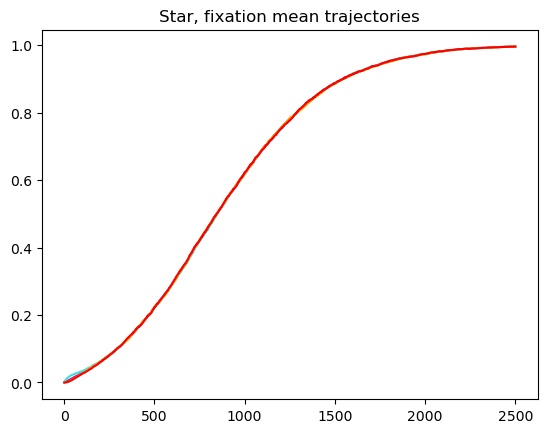

In [12]:
center = 'darkviolet'
leaf1 = 'turquoise'
leaf2 = 'orange'
leaf3 = 'red'

def trajectories(arr1,arr2,arr3,arr4,title):
    plt.plot(np.arange(1,x+1,1),arr1,color=center)
    plt.plot(np.arange(1,x+1,1),arr2,color=leaf1)
    plt.plot(np.arange(1,x+1,1),arr3,color=leaf2)
    plt.plot(np.arange(1,x+1,1),arr4,color=leaf3)
    plt.title(title)
    plt.show()
    
trajectories(star_fix_center,star_fix_1,star_fix_2,star_fix_3,'Star, fixation mean trajectories')

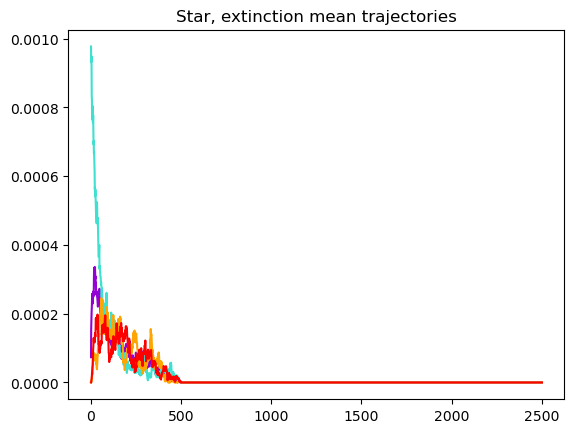

In [13]:
trajectories(star_ex_center,star_ex_1,star_ex_2,star_ex_3,'Star, extinction mean trajectories')

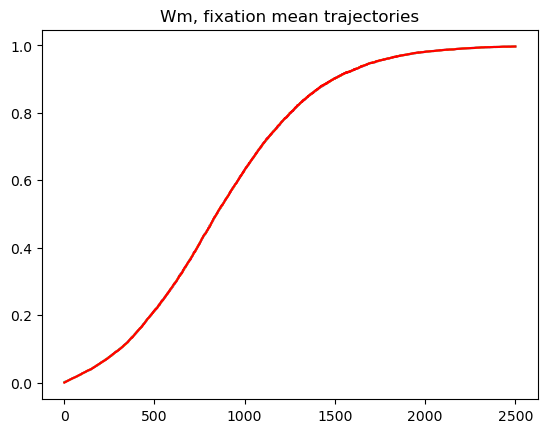

In [14]:
trajectories(wm_fix_center,wm_fix_1,wm_fix_2,wm_fix_3,'Wm, fixation mean trajectories')

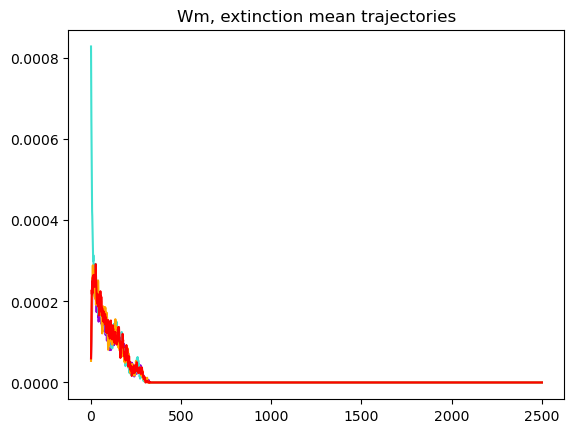

In [16]:
trajectories(wm_ex_center,wm_ex_1,wm_ex_2,wm_ex_3,'Wm, extinction mean trajectories')

### Std star

In [65]:
star_fix_center_std, star_fix_1_std, star_fix_2_std, star_fix_3_std = extracts_fix_std("Star_5deme",x,933)
star_ex_center_std, star_ex_1_std, star_ex_2_std, star_ex_3_std = extracts_ex_std("Star_5deme",x,int((nb_sim-933)/100))

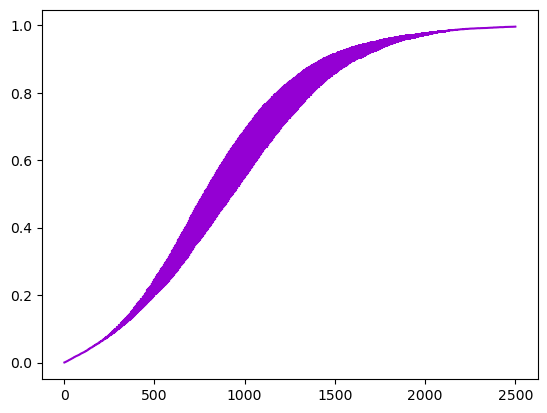

In [71]:
plt.errorbar(np.arange(1,x+1,1),star_fix_center, star_fix_center_std, color=center)
plt.show()

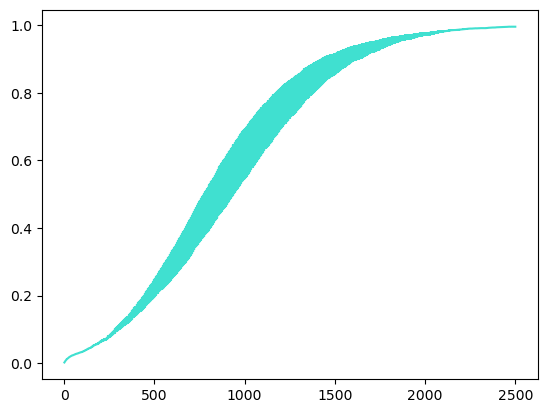

In [73]:
plt.errorbar(np.arange(1,x+1,1),star_fix_1, star_fix_1_std, color=leaf1)
plt.show()

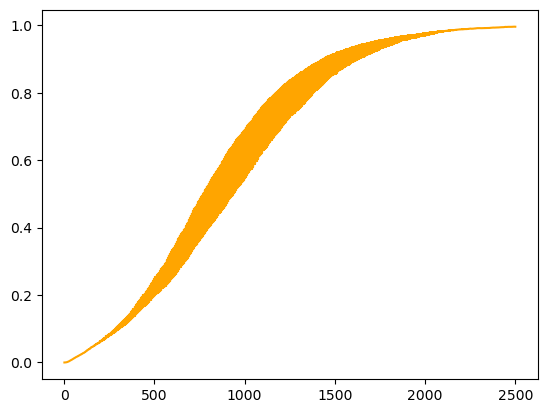

In [74]:
plt.errorbar(np.arange(1,x+1,1),star_fix_2, star_fix_2_std, color=leaf2)
plt.show()

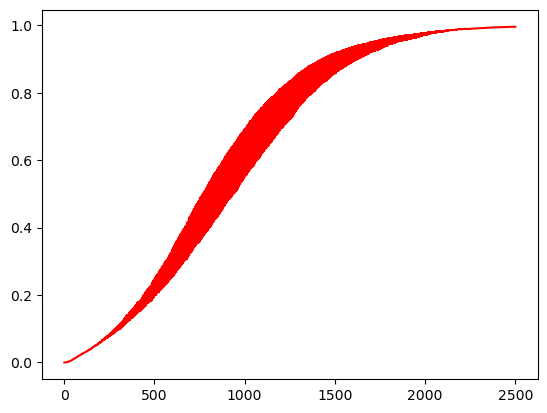

In [75]:
plt.errorbar(np.arange(1,x+1,1),star_fix_3, star_fix_3_std, color=leaf3)
plt.show()

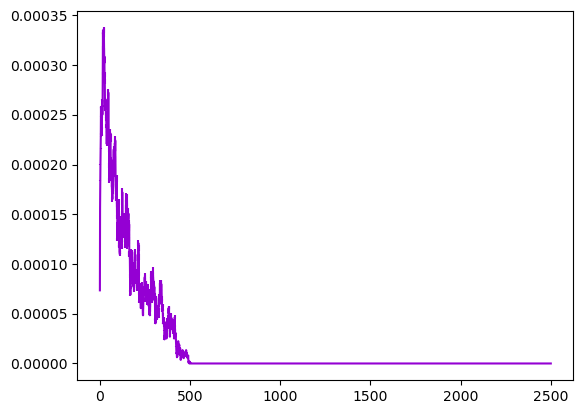

In [76]:
plt.errorbar(np.arange(1,x+1,1),star_ex_center, star_ex_center_std, color=center)
plt.show()

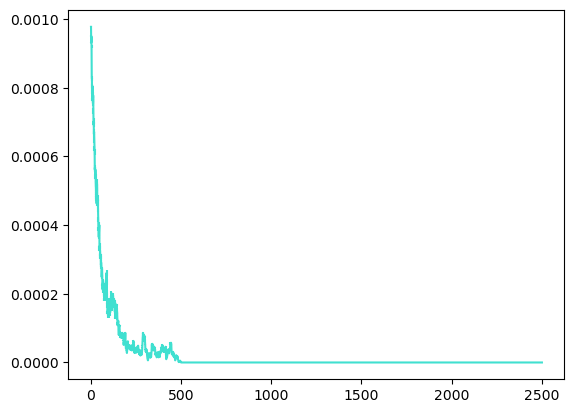

In [77]:
plt.errorbar(np.arange(1,x+1,1),star_ex_1, star_ex_1_std, color=leaf1)
plt.show()

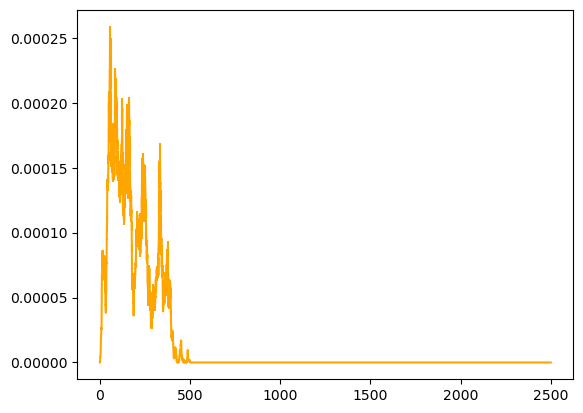

In [78]:
plt.errorbar(np.arange(1,x+1,1),star_ex_2, star_ex_2_std, color=leaf2)
plt.show()

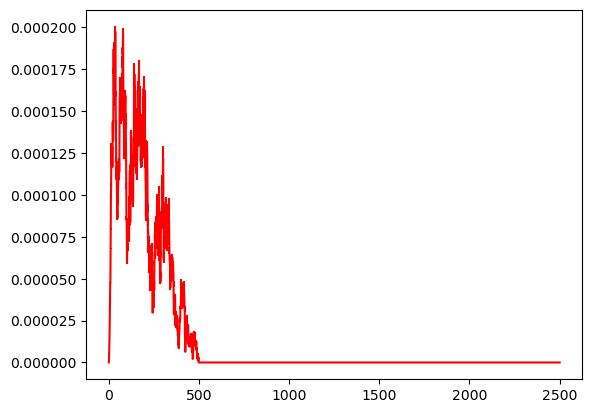

In [79]:
plt.errorbar(np.arange(1,x+1,1),star_ex_3, star_ex_3_std, color=leaf3)
plt.show()

### Std wm

In [81]:
wm_fix_center_std, wm_fix_1_std, wm_fix_2_std, wm_fix_3_std = extracts_fix_std("Wm_5deme",x,824)
wm_ex_center_std, wm_ex_1_std, wm_ex_2_std, wm_ex_3_std = extracts_ex_std("Wm_5deme",x,int((nb_sim-824)/100))

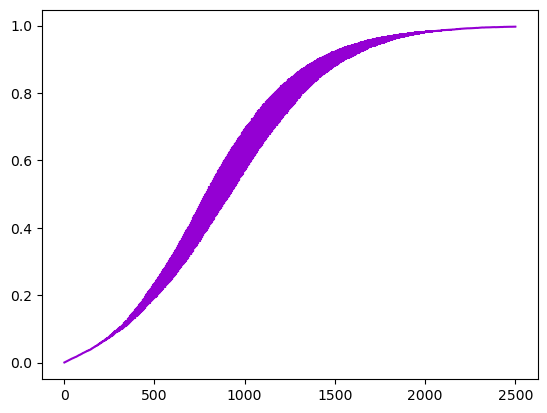

In [82]:
plt.errorbar(np.arange(1,x+1,1),wm_fix_center, wm_fix_center_std, color=center)
plt.show()

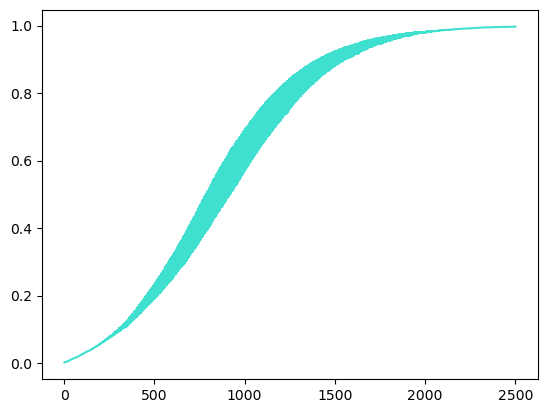

In [83]:
plt.errorbar(np.arange(1,x+1,1),wm_fix_1, wm_fix_1_std, color=leaf1)
plt.show()

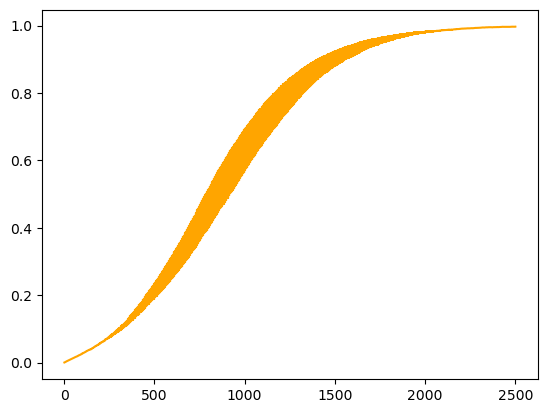

In [84]:
plt.errorbar(np.arange(1,x+1,1),wm_fix_2, wm_fix_2_std, color=leaf2)
plt.show()

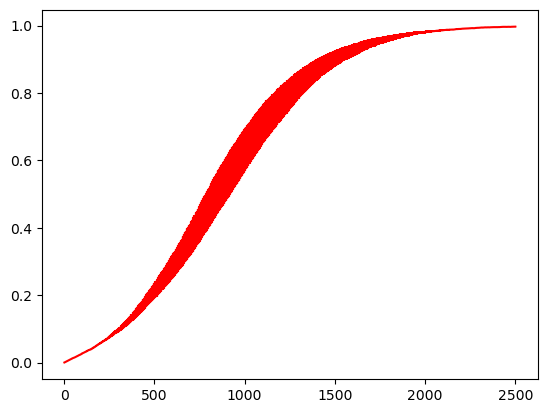

In [85]:
plt.errorbar(np.arange(1,x+1,1),wm_fix_3, wm_fix_3_std, color=leaf3)
plt.show()

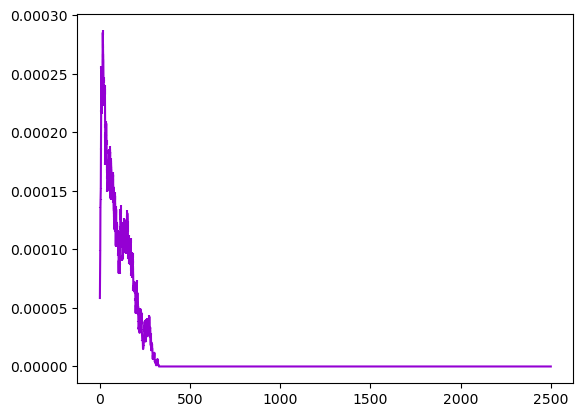

In [87]:
plt.errorbar(np.arange(1,x+1,1),wm_ex_center, wm_ex_center_std, color=center)
plt.show()

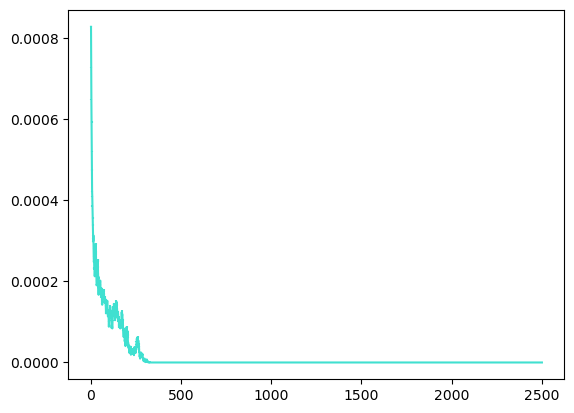

In [86]:
plt.errorbar(np.arange(1,x+1,1),wm_ex_1, wm_ex_1_std, color=leaf1)
plt.show()

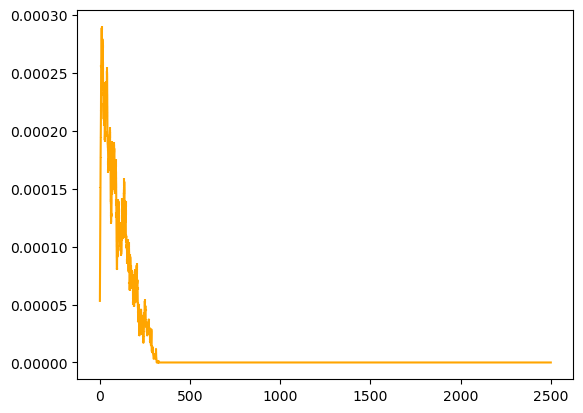

In [88]:
plt.errorbar(np.arange(1,x+1,1),wm_ex_2, wm_ex_2_std, color=leaf2)
plt.show()

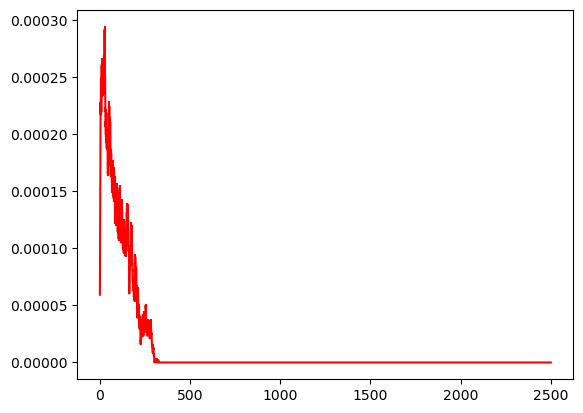

In [89]:
plt.errorbar(np.arange(1,x+1,1),wm_ex_3, wm_ex_3_std, color=leaf3)
plt.show()